In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%run loocvRF.py 

In [4]:
def LOOCV_featureselection(data, ids, outcomevar, dropcols, idcolumn, numestimators=1000):
    """
        Intermediate function. Please use loocvRF function.
            
    """
    # Separate data for leave-one-person-out-cross-validation (LOOCV)
    LOOCV_O = ids 
    data[idcolumn] = data[idcolumn].apply(str)
    data_filtered = data[data[idcolumn] != LOOCV_O]
    data_cv = data[data[idcolumn] == LOOCV_O]
     
    
    # Test data - the person left out of training
    data_test = data_cv.drop(columns=dropcols)
    X_test = data_test.drop(columns=[outcomevar])
    y_test = data_test[outcomevar] #This is the outcome variable
    
    # Train data - all other people in dataframe
    data_train = data_filtered.drop(columns=dropcols)
    X_train = data_train.drop(columns=[outcomevar])
    
    feature_list = list(X_train.columns)
    X_train= np.array(X_train)
    y_train = np.array(data_train[outcomevar]) #Outcome variable here

    
    from sklearn.ensemble import RandomForestRegressor
    # Instantiate model with numestimators decision trees
    rf = RandomForestRegressor(n_estimators = numestimators, random_state = 0)
    # Train the model on training data
    rf.fit(X_train, y_train);
    
    # Get importances:
    importances = list(rf.feature_importances_)# List of tuples with variable and importance
    important = pd.DataFrame()
    important['value'] = feature_list
    important['importances'] = importances
    
    return important

In [10]:
#data = pd.read_csv('Test_RFLOOCV.csv')
data05 = pd.read_csv("../../Siyi_all_final05.csv")
data05 = data05.drop(columns = ["Unnamed: 0","time"])
data05['label'] = data05['label'].astype("int32")
data05w = data05[['wrist.EDA.mean', 'wrist.EDA.std','wrist.EDA.min', 'wrist.EDA.max', 'wrist.EDA.slope', 'wrist.EDA.range','label','Subject']]

In [14]:
data05w1 = data05w[data05w['Subject'] == 2]
data05w1

,wrist.EDA.mean,wrist.EDA.std,wrist.EDA.min,wrist.EDA.max,wrist.EDA.slope,wrist.EDA.range,label,Subject
39578,1.161040,0.099367,0.950974,1.359204,-0.005452,0.408230,0,2
39579,1.153556,0.096657,0.950974,1.359204,-0.004994,0.408230,0,2
39580,1.145792,0.093504,0.950974,1.359204,-0.004496,0.408230,0,2
39581,1.138717,0.091422,0.950974,1.359204,-0.004145,0.408230,0,2
39582,1.132054,0.089024,0.950974,1.359204,-0.003726,0.408230,0,2
...,...,...,...,...,...,...,...,...
42568,0.229113,0.021174,0.195741,0.263794,-0.002370,0.068053,0,2
42569,0.226773,0.021088,0.193606,0.260804,-0.002360,0.067199,0,2
42570,0.224500,0.020968,0.192609,0.257957,-0.002346,0.065347,0,2
42571,0.222241,0.020890,0.190189,0.254967,-0.002336,0.064778,0,2


In [24]:
IDlist = list(data05w['Subject'])
#LOOCV_featureselection(data, 1, outcomevar='Outcome', dropcols=['Feature6'], idcolumn='ID', numestimators=1000)
#RFLOOCV(data,  1, outcomevar='Outcome', dropcols=['Feature6'], idcolumn='ID', fs=0.02)
errors, RMSE, RMSEstd, MAPE, MAPEstd, importances = loocvRF(data=data05w.head(100), idcolumn='Subject', outcomevar='label', dropcols=["wrist.EDA.mean"], numestimators=1000, fs=0.02)

C:\Users\xusiy\Desktop\Fall 2020\Indepedent Study\ML-Methods\loocvRF\loocvRF.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[idcolumn] = data[idcolumn].apply(str)


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

In [3]:
errors, RMSE, RMSEstd, MAPE, MAPEstd, importances = loocvRF(data=data, idcolumn='ID', outcomevar='Outcome', dropcols=['Feature6'], numestimators=1000, fs=0.02)

...1 processing complete.
...2 processing complete.
...3 processing complete.
...4 processing complete.
...5 processing complete.
...6 processing complete.
...7 processing complete.
...8 processing complete.
...9 processing complete.
...10 processing complete.
...11 processing complete.
...12 processing complete.
...13 processing complete.
...14 processing complete.
...15 processing complete.
Mean RMSE:1.0213999999999999
Std RMSE:0.7726137284137096
Mean MAPE:19.969092592592588
Std MAPE:20.44678133688207


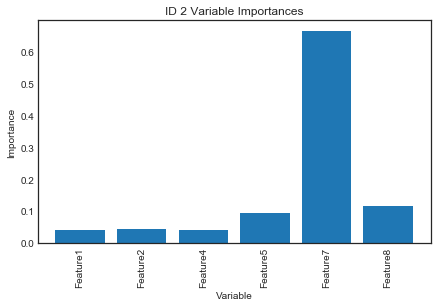

In [4]:
importanceplot(importances, '2', 'C:/Users/Brinnae/Root/')